TSLA Close     1
High      1
Low       1
Open      1
Volume    1
dtype: int64
BND Close     1
High      1
Low       1
Open      1
Volume    1
dtype: int64
SPY Close     1
High      1
Low       1
Open      1
Volume    1
dtype: int64
TSLA ADF Statistic: -1.4060, p-value: 0.5794
BND ADF Statistic: -1.5348, p-value: 0.5162
SPY ADF Statistic: 0.6922, p-value: 0.9897
VaR 95%: TSLA   -0.054657
BND    -0.004898
SPY    -0.017182
Name: 0.05, dtype: float64
Sharpe Ratios: TSLA    0.744390
BND    -0.007437
SPY     0.684249
dtype: float64


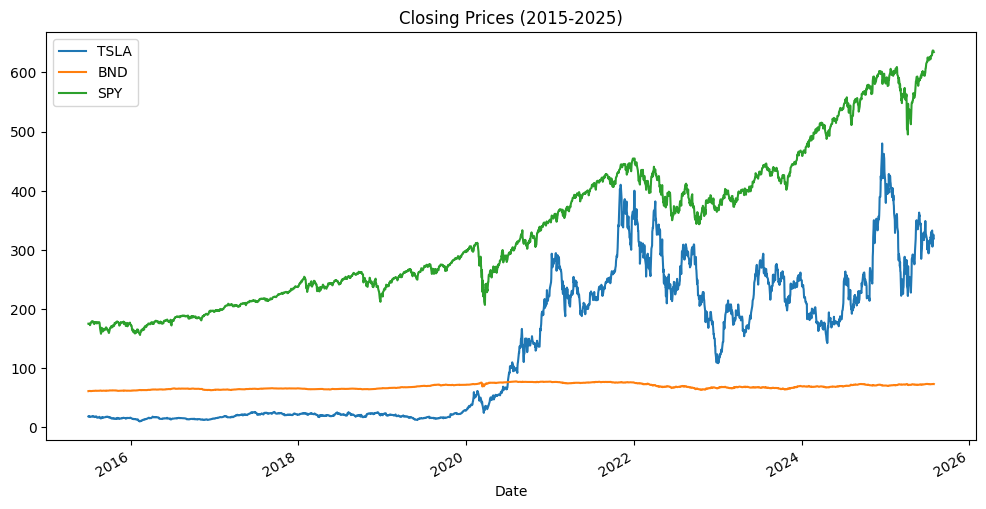

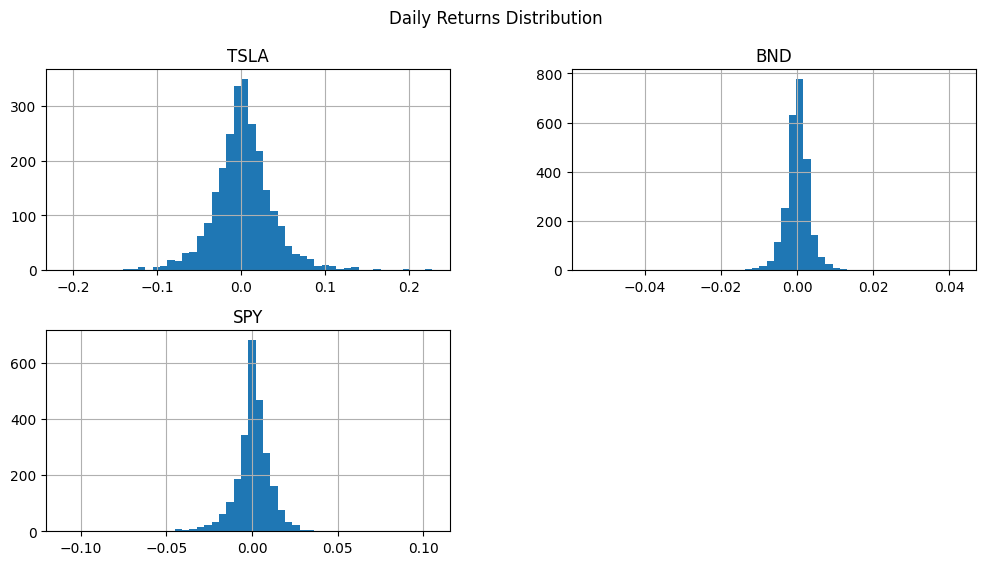

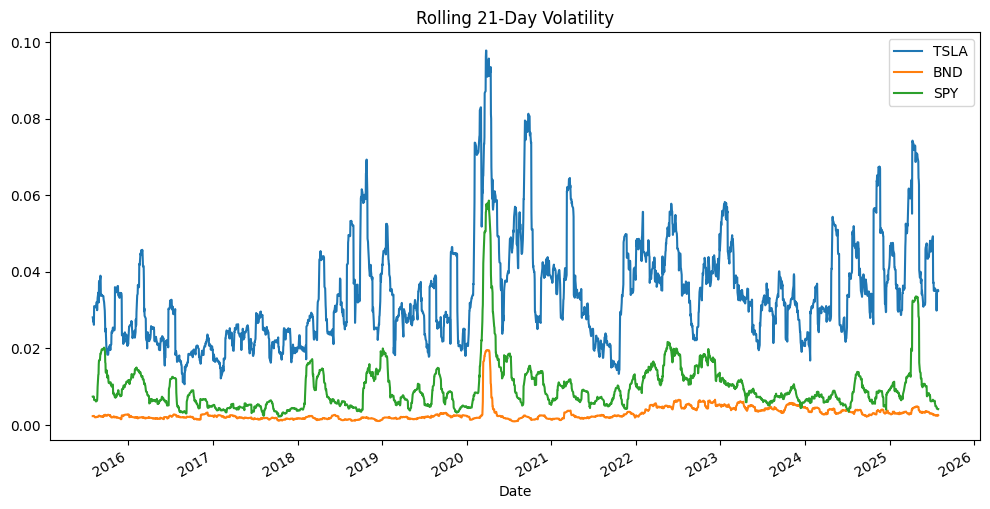

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller

# Load data
tickers = ["TSLA", "BND", "SPY"]
dfs = {t: pd.read_csv(f"/content/drive/MyDrive/week11/data/raw/{t}.csv", parse_dates=["Date"]) for t in tickers}

# Ensure sorted and indexed
for t in tickers:
    dfs[t].sort_values("Date", inplace=True)
    dfs[t].set_index("Date", inplace=True)

# Convert relevant columns to numeric, coercing errors
for t in tickers:
    for col in ["Close", "High", "Low", "Open", "Volume"]:
        if col in dfs[t].columns:
            dfs[t][col] = pd.to_numeric(dfs[t][col], errors='coerce')

# Check for missing values
for t in tickers:
    print(t, dfs[t].isna().sum())

# Handle missing values
for t in tickers:
    dfs[t].interpolate(method='linear', inplace=True)

# Merge Close into single DataFrame
close_prices = pd.concat({t: dfs[t]["Close"] for t in tickers}, axis=1)

# Daily returns
returns = close_prices.pct_change().dropna()

# Rolling volatility (21-day)
rolling_vol = returns.rolling(21).std()

# ADF Test on closing prices
for t in tickers:
    result = adfuller(close_prices[t].dropna())
    print(f"{t} ADF Statistic: {result[0]:.4f}, p-value: {result[1]:.4f}")

# Value at Risk (95%)
VaR_95 = returns.quantile(0.05)
print("VaR 95%:", VaR_95)

# Sharpe Ratio (risk-free ~2%)
rf = 0.02 / 252
sharpe = ((returns.mean() - rf) / returns.std()) * np.sqrt(252)
print("Sharpe Ratios:", sharpe)

# Plot Closing Prices
close_prices.plot(figsize=(12,6))
plt.title("Closing Prices (2015-2025)")
plt.show()

# Plot Daily Returns Distribution
returns.hist(bins=50, figsize=(12,6))
plt.suptitle("Daily Returns Distribution")
plt.show()

# Rolling Volatility
rolling_vol.plot(figsize=(12,6))
plt.title("Rolling 21-Day Volatility")
plt.show()

The error message `FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/week11/data/rawTSLA.csv'` indicates that the code is unable to find the specified file at the given path. Please ensure that the files `rawTSLA.csv`, `rawBND.csv`, and `rawSPY.csv` exist in the `/content/drive/MyDrive/week11/data/` directory in your Google Drive and that the file paths in the code are correct.